<a href="https://colab.research.google.com/github/Zaxis018/Data-Mining/blob/main/Naive_bayes/Nepali_text_classification_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/Colab_Notebooks/Nepali_News_Classification.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)


In [ ]:
df.head(10)


,headings,paras,label
0,कर्णालीका सुइना,उमेरले ७० कटेका पूर्णबहादुर विश्वकर्मा ७ वर्षी...,entertainment
1,साकुराजस्तो प्रेमकथा,जापान भन्नेबित्तिकै पैंयु साकुरा फूलको चर्चा ह...,entertainment
2,भद्रगोल नै ट्रेन्डिङमा,नेपाल टेलिभिजनबाट हरेक शुक्रबार साँझ प्रसारण ह...,entertainment
3,फेरिए लोकभाका चर्चामा सामाजिक गीत,"दोहोरी भन्नासाथ सोचिन्छ, यो केटा–केटीबीचको जुह...",entertainment
4,भूकम्पले भत्केको सपना,च्यान्टे र मनमायाको स्थानीय परम्पराअनुसार विवा...,entertainment
5,‘जात्रैजात्रा’ वैशाख अन्त्यमा,सफल फिल्म ‘जात्रा’ को सिक्वेलको रूपमा बनेको ‘ज...,entertainment
6,लहर व्यंग्य गीतको,चर्को असन्तुष्टि र विवादपछि गायक पशुपति शर्माल...,entertainment
7,फोटोले काम गुमाएका सिद्दिकी,यति बेला नवाजुद्दिन सिद्दिकी बलिउडका लागि हट क...,entertainment
8,सकियो माइक ड्रप,स्ट्यान्डअप कमेडीलाई नयाँ ढंगले पस्कने सुरुवात...,entertainment
9,पोखियो कर्णालीको व्यथा,जन्मँदा बालक तर हुर्किंदै गर्दा स्वभाव भने बाल...,entertainment


In [ ]:
#check for null values
df.isnull()

,headings,paras,label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7465,False,False,False
7466,False,False,False
7467,False,False,False
7468,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headings  7470 non-null   object
 1   paras     7470 non-null   object
 2   label     7470 non-null   object
dtypes: object(3)
memory usage: 175.2+ KB


##Visualizing the dataset

In [ ]:
df.shape

(7470, 3)

In [ ]:
class_counts = df['label'].value_counts()
print(class_counts)

business         2628
sports           2574
entertainment    2268
Name: label, dtype: int64


In [ ]:
#remove title column
df = df.drop(df.columns[0], axis=1)

In [ ]:
df.head()

,paras,label
0,उमेरले ७० कटेका पूर्णबहादुर विश्वकर्मा ७ वर्षी...,entertainment
1,जापान भन्नेबित्तिकै पैंयु साकुरा फूलको चर्चा ह...,entertainment
2,नेपाल टेलिभिजनबाट हरेक शुक्रबार साँझ प्रसारण ह...,entertainment
3,"दोहोरी भन्नासाथ सोचिन्छ, यो केटा–केटीबीचको जुह...",entertainment
4,च्यान्टे र मनमायाको स्थानीय परम्पराअनुसार विवा...,entertainment


In [ ]:
df.sample(frac=1).reset_index(drop=True)

,paras,label
0,खेलकुदको सर्वोच्च निकाय राष्ट्रिय खेलकुद परिषद...,sports
1,अर्जेन्टिनाका स्ट्राइकर एवं स्पेनी क्लब बार्सि...,sports
2,ललितपुरलाई कलासंस्कृति मात्रै नभई ‘तन्त्रको सह...,entertainment
3,तेस्रो संस्करणको धनगढी प्रिमियर लिगमा उत्कृष्ट...,sports
4,२० मिनेट लामो म्युजिक भिडियो समेटिएको एक ऐतिहा...,entertainment
...,...,...
7465,बलिउड फिल्म ‘हेट स्टोरी ४’ को ट्रेलर बुधबार ने...,entertainment
7466,त्रिभुवन आर्मी क्लबले तेस्रोपल्ट मगमग चौथो झाप...,sports
7467,कप्तान विनोद भण्डारीको आक्रामक इनिङ्समा त्रिभु...,sports
7468,सांगीतिक प्रस्तुतिका लागि पहिलो पटक अस्ट्रेलिय...,entertainment


business         2628
sports           2574
entertainment    2268
Name: label, dtype: int64


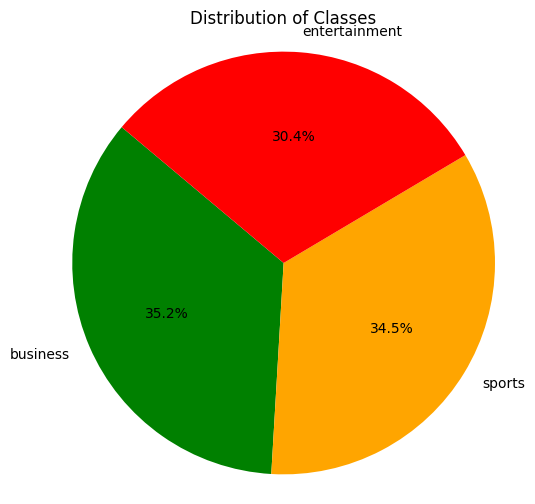

In [ ]:
class_counts = df['label'].value_counts()
print(class_counts)
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'red'])
plt.axis('equal')

# Add a title
plt.title('Distribution of Classes')

# Display the pie chart
plt.show()

In [ ]:
df['paras'][0]

'उमेरले ७० कटेका पूर्णबहादुर विश्वकर्मा ७ वर्षीया बिरामी नातिनीको उपचार गर्न घरबाट हिँड्छन्\u202f। बाटोमा झमक्क साँझ पर्छ\u202f। दायाँबायाँ छिटपुट घर छन् तर दलित भएकै कारण बास पाउँदैनन्\u202f। बल्लतल्ल गोठमा ओत लाग्न पाए पनि खानेकुरा दिइँदैन\u202f। राति बिरामी नातिनी ‘भोक लाग्यो’ भन्दै मुख बाउँछिन्\u202f। '

In [ ]:
len(df['paras'][0])

281

In [ ]:
#punctuation removal
import re
# Define a function to remove unnecessary punctuations from Nepali text
def remove_punctuation(text):
    # Define the regular expression pattern to remove punctuations
    punctuation_pattern = r'[।?,:;\'",.()\n&—‘’“”!-]'  # Add other punctuations as needed

    # Use regular expression to remove punctuations
    return re.sub(punctuation_pattern, '', text)

# Apply the function to remove punctuations from the 'Sentences' column
df['paras'] = df['paras'].apply(remove_punctuation)


In [ ]:
print(df['paras'][0])

उमेरले ७० कटेका पूर्णबहादुर विश्वकर्मा ७ वर्षीया बिरामी नातिनीको उपचार गर्न घरबाट हिँड्छन्  बाटोमा झमक्क साँझ पर्छ  दायाँबायाँ छिटपुट घर छन् तर दलित भएकै कारण बास पाउँदैनन्  बल्लतल्ल गोठमा ओत लाग्न पाए पनि खानेकुरा दिइँदैन  राति बिरामी नातिनी भोक लाग्यो भन्दै मुख बाउँछिन्  


In [ ]:
len(df['paras'][0])

274

In [ ]:
#define a proper function to calculate words in a nepali text.
def get_length(text):
    # Split the text into words based on spaces
    words = text.split()

    # Return the number of words in the text
    return len(words)

In [ ]:
get_length(df['paras'][0])

43

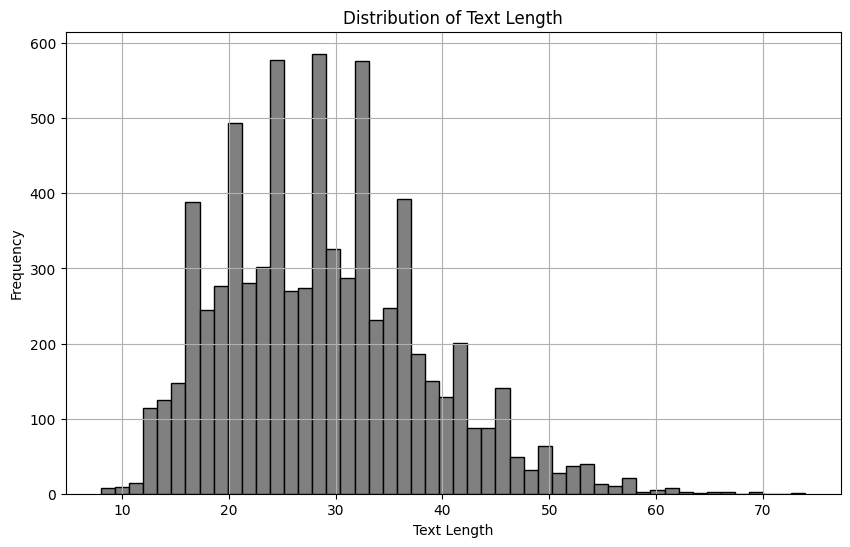

In [ ]:
# Apply the function to calculate the text length for each instance
text_length = df['paras'].apply(get_length)

# Plot the text length distribution
plt.figure(figsize=(10, 6))
plt.hist(text_length, bins=50, color='gray', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.grid(True)
plt.show()


In [ ]:
#stopwords removal
nepali_stopwords=['छ','र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको','आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ', 'जान', 'जाहिर', 'जे', 'जो',  'तदनुसार', 'तपाईको', 'तपाई', 'पर्याप्त','पहिल्यै',  'तापनी', 'तिनी', 'तिनीहरू', 'तिनीहरुको', 'तिनिहरुलाई', 'तिमी', 'तिर', 'तीन', 'तुरुन्तै', 'तेस्रो', 'तेस्कारण', 'पूर्व', 'प्रति', 'प्रतेक','फेरी', 'बने', 'त्सपछि', 'त्सैले', 'त्यहाँ', 'थिएन', 'दिनुभएको', 'दिनुहुन्छ', 'दुई', 'देखि', 'बरु', 'बारे', 'बाहिर', 'देखेको', 'देखेर', 'दोस्रो', 'धेरै', 'नजिकै', 'नत्र', 'नयाँ', 'निम्ति', 'बाहेक', 'बीच', 'बीचमा', 'भन', 'निम्न', 'निम्नानुसार', 'निर्दिष्ट', 'नौ', 'पक्का', 'पक्कै', 'पटक', 'पर्छ', 'पर्थ्यो', 'भन्छन्', 'भन्', 'भन्छु', 'भन्दा', 'भन्नुभयो', 'भर', 'भित्र', 'भित्री', 'म', 'मलाई', 'मात्र', 'माथि','मेरो', 'यति', 'यथोचित', 'यदि', 'यद्यपि', 'यसको', 'यसपछि', 'यसबाहेक', 'यसरी', 'यसो', 'यस्तो', 'यहाँ', 'यहाँसम्म', 'या', 'रही', 'राखे', 'लगभग', 'वरीपरी', 'वास्तवमा', 'बिरुद्ध', 'बिशेष', 'सायद', 'शायद', 'संग', 'संगै', 'सक्छ', 'सट्टा', 'सधै', 'सबै', 'सबैलाई', 'सम्म','साँच्चै', 'सात', 'साथ', 'साथै', 'हरे', 'हरेक']

In [ ]:
# Function to remove Nepali stopwords from a sentence
def remove_stopwords(sentence):
    words = sentence.split()
    filtered_sentence = [word for word in words if word.lower() not in nepali_stopwords]
    return ' '.join(filtered_sentence)

# Create a new DataFrame with processed 'Sentences' (Nepali stopwords removed)
new_df = df.copy()
new_df['paras'] = new_df['paras'].apply(remove_stopwords)

In [ ]:
new_df.head()

,paras,label
0,उमेरले ७० कटेका पूर्णबहादुर विश्वकर्मा ७ वर्षी...,entertainment
1,जापान भन्नेबित्तिकै पैंयु साकुरा फूलको चर्चा प...,entertainment
2,नेपाल टेलिभिजनबाट शुक्रबार साँझ प्रसारण हुँदै ...,entertainment
3,दोहोरी भन्नासाथ सोचिन्छ केटा–केटीबीचको जुहारी ...,entertainment
4,च्यान्टे मनमायाको स्थानीय परम्पराअनुसार विवाह ...,entertainment


In [ ]:
new_df['paras'][0]

'उमेरले ७० कटेका पूर्णबहादुर विश्वकर्मा ७ वर्षीया बिरामी नातिनीको उपचार घरबाट हिँड्छन् बाटोमा झमक्क साँझ दायाँबायाँ छिटपुट घर दलित भएकै कारण बास पाउँदैनन् बल्लतल्ल गोठमा ओत लाग्न पाए खानेकुरा दिइँदैन राति बिरामी नातिनी भोक लाग्यो भन्दै मुख बाउँछिन्'

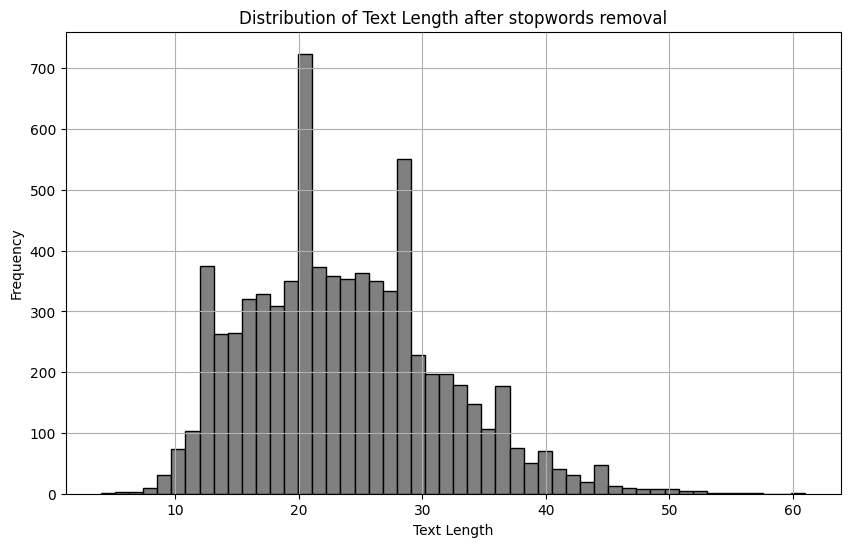

In [ ]:
# Apply the function to calculate the text length for each instance
text_length = new_df['paras'].apply(get_length)

# Plot the text length distribution
plt.figure(figsize=(10, 6))
plt.hist(text_length, bins=50, color='gray', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length after stopwords removal')
plt.grid(True)
plt.show()


In [ ]:
print(np.max(np.array(text_length)),',',np.min(np.array(text_length)))

61 , 4


##Wordcloud

In [ ]:
font_path="/content/drive/MyDrive/Colab_Notebooks/Mangal400.TTF"

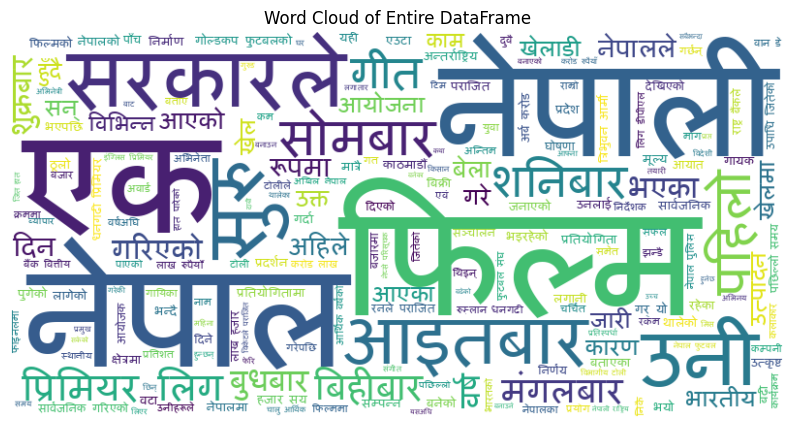

In [ ]:
from wordcloud import WordCloud
# Combine all the text data into a single string
text_data = ' '.join(new_df['paras'])
# Create a WordCloud object with the custom font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path,regexp=r"[\u0900-\u097F]+").generate(text_data,)
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Entire DataFrame')
plt.show()


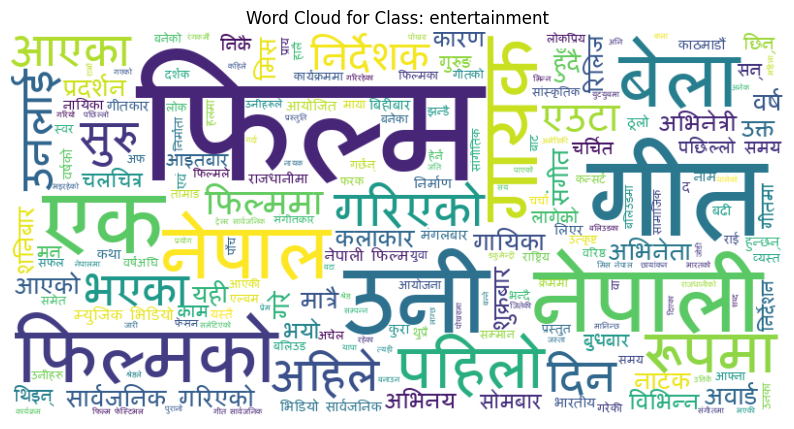

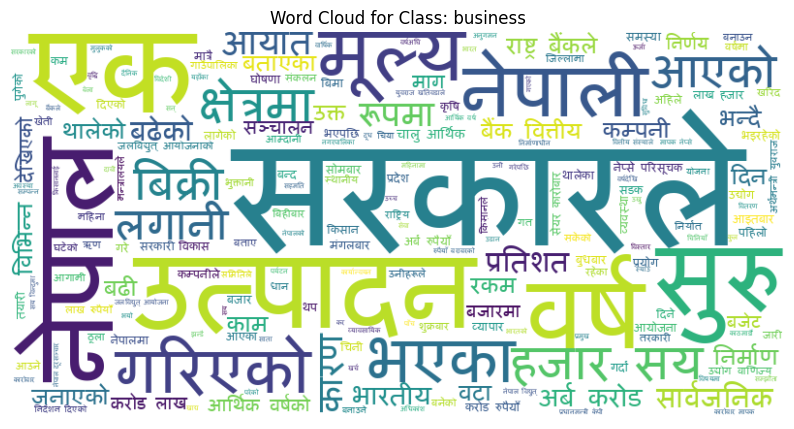

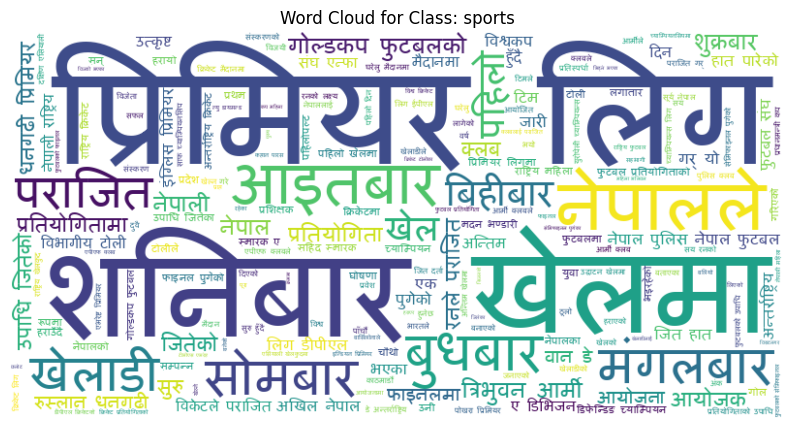

In [ ]:
#word cloud of preprocessed data
sentiments = new_df['label'].unique()

# Function to create and display a WordCloud for a specific sentiment category
def generate_wordcloud_for_sentiment(sentiment):
    # Filter the DataFrame for the current sentiment
    filtered_df = new_df[new_df['label'] == sentiment]

    # Combine all the text data for the current sentiment into a single string
    textual_data = ' '.join(filtered_df['paras'])

    # Create a WordCloud object with the custom font
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path,regexp=r"[\u0900-\u097F]+").generate(textual_data)

    # Display the WordCloud for the current sentiment
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Class: {sentiment}')
    plt.show()

# Generate WordClouds for each sentiment category
for sentiment in sentiments:
    generate_wordcloud_for_sentiment(sentiment)


##Vectorizing the textual data through count-vectorizer

In [ ]:
new_df=new_df.sample(frac=1).reset_index(drop=True)

In [ ]:
new_df.head()

,paras,label
0,तामाङ फिल्म म्लाङ प्वाँहार कालो अरिङ्गाल की ना...,entertainment
1,महत्त्वाकांक्षी लक्ष्यसहित ऊर्जा जलस्रोत सिँचा...,business
2,नेपालले भुटानको सामना गर्दा तनाव कहिले महसुस न...,sports
3,असार मसान्तसम्ममा मुलुकभर अघिल्लो वर्षको तुलना...,business
4,लभस्टोरीमा आधारित नेपाली फिल्म लिलिबिली मुलुकब...,entertainment


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Create an instance of TfidfVectorizer
count_vectorizer= CountVectorizer(max_features=300)#most repeated 300 words

# Fit and transform the text data using the vectorizer
X1=count_vectorizer.fit_transform(new_df['paras']).toarray()


In [ ]:
print(X1[0],X1[0].shape)#6238 unique words

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0] (300,)


In [ ]:

# Convert the NumPy ndarray to a pandas DataFrame
X1_df = pd.DataFrame(X1)
X1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=new_df['label']

In [ ]:
print(y)

0       entertainment
1            business
2              sports
3            business
4       entertainment
            ...      
7465         business
7466         business
7467         business
7468    entertainment
7469           sports
Name: label, Length: 7470, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_df, y, test_size=0.2, random_state=42)

In [ ]:

X_train1.shape

(5976, 300)

In [ ]:
y_train1.shape

(5976,)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
modelGNB=GaussianNB()
modelMNB=MultinomialNB()
modelBNB=BernoulliNB()

modelGNB.fit(X_train1,y_train1)
modelMNB.fit(X_train1,y_train1)
modelBNB.fit(X_train1,y_train1)

BernoulliNB()

In [ ]:
y_pred11=modelGNB.predict(X_test1)
y_pred12=modelMNB.predict(X_test1)
y_pred13=modelBNB.predict(X_test1)

In [ ]:
y_pred11

array(['sports', 'sports', 'entertainment', ..., 'entertainment',
       'business', 'sports'], dtype='<U13')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
def get_report_and_cm(name):
  cm = confusion_matrix(y_test1, name)


  class_names = ['sports', 'entertainment','business']
  cr = classification_report(y_test1, name, target_names=class_names)


  print("Confusion Matrix:")
  print(cm)

  print("\nClassification Report:")
  print(cr)


In [ ]:
get_report_and_cm(y_pred11)
get_report_and_cm(y_pred12)
get_report_and_cm(y_pred13)

Confusion Matrix:
[[488  25  14]
 [126 258  44]
 [ 64  36 439]]

Classification Report:
               precision    recall  f1-score   support

       sports       0.72      0.93      0.81       527
entertainment       0.81      0.60      0.69       428
     business       0.88      0.81      0.85       539

     accuracy                           0.79      1494
    macro avg       0.80      0.78      0.78      1494
 weighted avg       0.80      0.79      0.79      1494

Confusion Matrix:
[[464  48  15]
 [ 47 343  38]
 [ 29  41 469]]

Classification Report:
               precision    recall  f1-score   support

       sports       0.86      0.88      0.87       527
entertainment       0.79      0.80      0.80       428
     business       0.90      0.87      0.88       539

     accuracy                           0.85      1494
    macro avg       0.85      0.85      0.85      1494
 weighted avg       0.85      0.85      0.85      1494

Confusion Matrix:
[[452  58  17]
 [ 51 337  40]


In [ ]:
class_names = ['sports', 'entertainment','business']

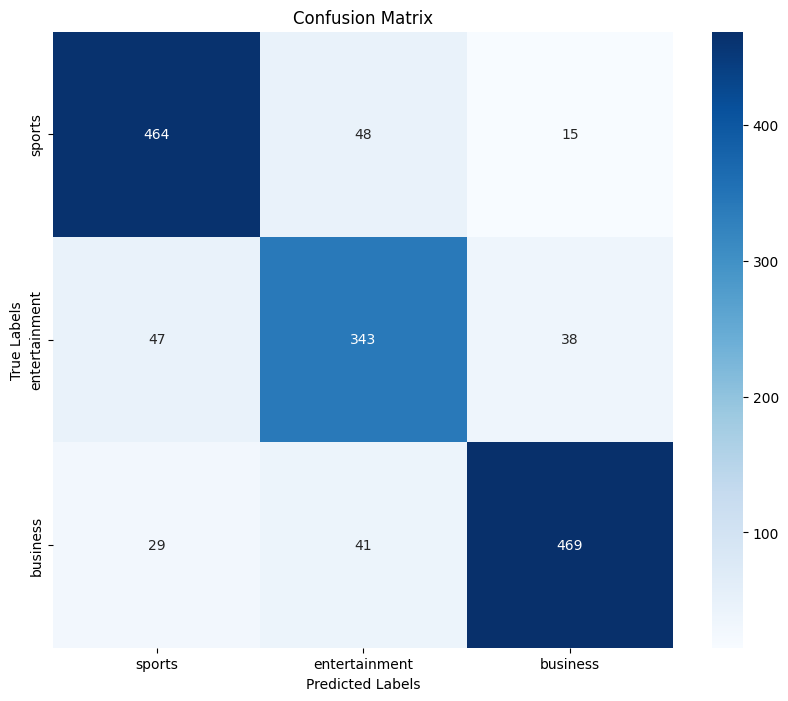

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test1, y_pred12), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##Vectorizing textual data through TF_IDF

In [ ]:

new_df.head()

,paras,label
0,तामाङ फिल्म म्लाङ प्वाँहार कालो अरिङ्गाल की ना...,entertainment
1,महत्त्वाकांक्षी लक्ष्यसहित ऊर्जा जलस्रोत सिँचा...,business
2,नेपालले भुटानको सामना गर्दा तनाव कहिले महसुस न...,sports
3,असार मसान्तसम्ममा मुलुकभर अघिल्लो वर्षको तुलना...,business
4,लभस्टोरीमा आधारित नेपाली फिल्म लिलिबिली मुलुकब...,entertainment


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk


nltk.download('punkt')
nltk.download('stopwords')

all_text = new_df['paras'].tolist()
# Join all the text elements into a single string
combined_text = ' '.join(all_text)

# Tokenize the combined text into words
words = word_tokenize(combined_text)

#remove stopwords
stop_words = set(stopwords.words('nepali'))
words = [word for word in words if word not in stop_words]

# Create the vocabulary (set of unique words)
vocabulary = set(words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(vocabulary)

{'संस्थानमध्ये', 'राष्ट्रपतिबीच', 'खुट्किलोको', 'खोकियोअहिले', 'खेप्नुपरेको', 'अमेरिकालाई', 'बिटल्स', 'पर्दाको', 'शरणकुमार', 'योजनाले', 'बुबा', 'अविशा', 'राजनैतिक', 'उपचारपछि', 'इन्टरप्राइजेजले', 'झगराज', 'पाउनका', 'सेभिल्लालाई', 'राख्नु', 'पोखरीमा', 'गरिदियो', 'यमनसँग', 'एबीसी', 'संक्रमित', 'अप्ठयारो', 'खेलकुदले', 'चञ्चला', 'गोप्य', '७१–५०', 'टुँडिखेलमा', 'यात्रीहरूका', 'बंगलादेश', 'रेडियोकी', 'प्रशिक्षण', 'क्रोएसियाली', 'बित्न', 'गनिन्छ', 'राजबल्लभ', 'स्टील', 'मौरीको', 'संगीता', 'दिन्न', 'रवीन्द्रसिंह', 'न्युगिनी', '२०२४', 'पहिरोबाट', 'टुँडिखेलको', 'बजारकै', 'मंगलसिह', 'अन्तशुल्क', 'टयामी', 'श्रीलंकासँग', 'पातारासीकी', 'मञ्जरी', 'निल्नै', 'नहुँदा', 'रंगशंकरा', 'तीनजना', 'निक्कै', 'सूर्यमढी', 'दिनहुँजसो', 'जोरपाटी', 'सुधारमा', 'आमचोक', 'एनगिडीको', 'ऐनबाट', 'तरन्नुमको', 'प्रमाण', 'निगम', 'फिगो', 'जलालको', 'प्ल्याटिनम', 'जहदा', 'दूतसमेत', 'गर्नेबाहेक', 'वर्षाको', 'छिल्लरले', 'मध्याह्नको', 'जुलाई', '४०५', 'पात्र', 'सिर्जना', 'अरिङ्गाल', 'बीचबाट', 'ब्यान्डविथबापत', 'मेयरकप', 'सीमा', 'शाङह

In [ ]:
print(len(vocabulary))

33650


In [ ]:
def tokenize_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

# Apply tokenization to the 'text' column in the DataFrame
new_df['tokenized_text'] = new_df['paras'].apply(tokenize_text)


In [ ]:
new_df.head()

,paras,label,tokenized_text
0,तामाङ फिल्म म्लाङ प्वाँहार कालो अरिङ्गाल की ना...,entertainment,"[तामाङ, फिल्म, म्लाङ, प्वाँहार, कालो, अरिङ्गाल..."
1,महत्त्वाकांक्षी लक्ष्यसहित ऊर्जा जलस्रोत सिँचा...,business,"[महत्त्वाकांक्षी, लक्ष्यसहित, ऊर्जा, जलस्रोत, ..."
2,नेपालले भुटानको सामना गर्दा तनाव कहिले महसुस न...,sports,"[नेपालले, भुटानको, सामना, गर्दा, तनाव, कहिले, ..."
3,असार मसान्तसम्ममा मुलुकभर अघिल्लो वर्षको तुलना...,business,"[असार, मसान्तसम्ममा, मुलुकभर, अघिल्लो, वर्षको,..."
4,लभस्टोरीमा आधारित नेपाली फिल्म लिलिबिली मुलुकब...,entertainment,"[लभस्टोरीमा, आधारित, नेपाली, फिल्म, लिलिबिली, ..."


In [ ]:
#finally apply tf-idf vectorization
# Convert tokenized_text back to strings from lists of words
new_df['tokenized_text'] = new_df['tokenized_text'].apply(lambda tokens: ' '.join(tokens))

# Initialize the TF-IDF vectorizer with vocabulary
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary, max_features=500)
tfidf_vectors = tfidf_vectorizer.fit_transform(new_df['tokenized_text'])

In [ ]:
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
new_df = pd.concat([new_df, tfidf_df], axis=1)

In [ ]:
print()

In [ ]:
new_df.head()

,paras,label,tokenized_text,http//cricketekantipurcom/,अ,अँधेरी,अँध्यारा,अँध्यारै,अँध्यारो,अँध्यारोमा,...,९७३,९८,९९,९–०,​आमेश,‌,‌औं,–,–मणि,†
0,तामाङ फिल्म म्लाङ प्वाँहार कालो अरिङ्गाल की ना...,entertainment,तामाङ फिल्म म्लाङ प्वाँहार कालो अरिङ्गाल की ना...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,महत्त्वाकांक्षी लक्ष्यसहित ऊर्जा जलस्रोत सिँचा...,business,महत्त्वाकांक्षी लक्ष्यसहित ऊर्जा जलस्रोत सिँचा...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,नेपालले भुटानको सामना गर्दा तनाव कहिले महसुस न...,sports,नेपालले भुटानको सामना गर्दा तनाव कहिले महसुस न...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,असार मसान्तसम्ममा मुलुकभर अघिल्लो वर्षको तुलना...,business,असार मसान्तसम्ममा मुलुकभर अघिल्लो वर्षको तुलना...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,लभस्टोरीमा आधारित नेपाली फिल्म लिलिबिली मुलुकब...,entertainment,लभस्टोरीमा आधारित नेपाली फिल्म लिलिबिली मुलुकब...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
np.max(np.array(tfidf_df.head(1)))

0.7837471681156719

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(tfidf_df, y, test_size=0.2, random_state=42)

In [ ]:
modelGNB.fit(X_train2,y_train2)
modelMNB.fit(X_train2,y_train2)
modelBNB.fit(X_train2,y_train2)

BernoulliNB()

In [ ]:
y_pred21=modelGNB.predict(X_test2)
y_pred22=modelMNB.predict(X_test2)
y_pred23=modelBNB.predict(X_test2)

In [ ]:
get_report_and_cm(y_pred21)
get_report_and_cm(y_pred22)
get_report_and_cm(y_pred23)

Confusion Matrix:
[[ 71 148 308]
 [  6 174 248]
 [  5  38 496]]

Classification Report:
               precision    recall  f1-score   support

       sports       0.87      0.13      0.23       527
entertainment       0.48      0.41      0.44       428
     business       0.47      0.92      0.62       539

     accuracy                           0.50      1494
    macro avg       0.61      0.49      0.43      1494
 weighted avg       0.61      0.50      0.43      1494

Confusion Matrix:
[[422  53  52]
 [124 228  76]
 [ 81  27 431]]

Classification Report:
               precision    recall  f1-score   support

       sports       0.67      0.80      0.73       527
entertainment       0.74      0.53      0.62       428
     business       0.77      0.80      0.79       539

     accuracy                           0.72      1494
    macro avg       0.73      0.71      0.71      1494
 weighted avg       0.73      0.72      0.72      1494

Confusion Matrix:
[[462  10  55]
 [214 108 106]


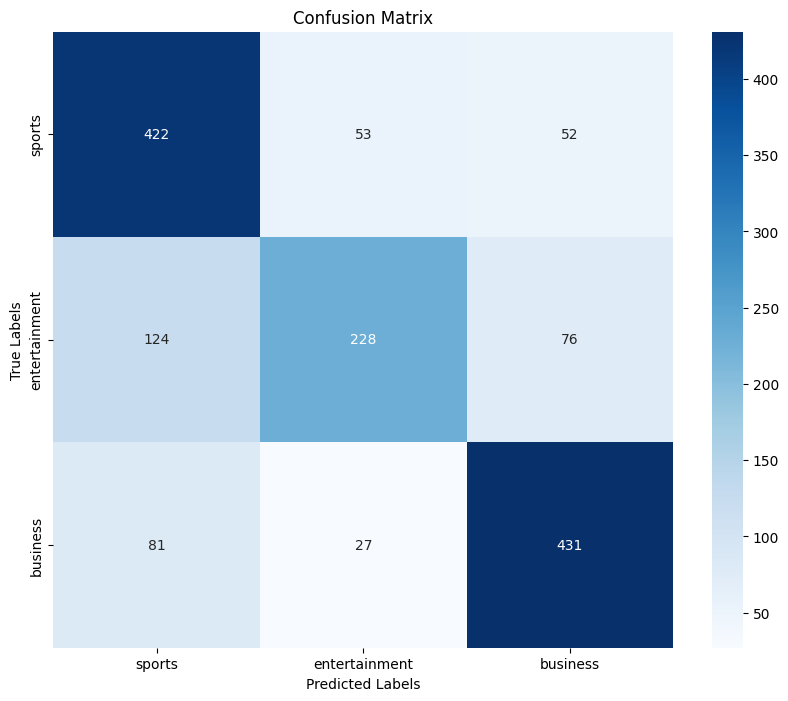

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test2, y_pred22), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()